# **NUMERICAL TOOLS FOR QUANTITATIVE FINANCE**
---
<img src="http://www.doc.ic.ac.uk/~afd/images/logo_imperial_college_london.png" align = "left" width=200>
 <br><br><br><br>
 
- Copyright (c) Antoine Jacquier, 2021. All rights reserved

- Author: Jack Jacquier <a.jacquier@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.9

In [3]:
import numpy as np
import matplotlib.pylab as plt
plt.style.use('dark_background')
import time
import pandas as pd

# Session Overview

- Vectorisation of functions
- Convolutions of functions
- Numerical integration
- Optimisation and root finding
- Application to option pricing

# The importance of vectorisation

## Reminder on variable types

In [4]:
x_range = range(5)
x_list = [0, 1, 2, 3, 4]
x_array = np.arange(0, 5, 1)

print(x_range, ": ", [x for x in x_range], type(x_range))
print(x_list, type(x_list))
print(x_array, type(x_array))

range(0, 5) :  [0, 1, 2, 3, 4] <class 'range'>
[0, 1, 2, 3, 4] <class 'list'>
[0 1 2 3 4] <class 'numpy.ndarray'>


In [5]:
print(x_array, " and ",  2.*x_array)

[0 1 2 3 4]  and  [0. 2. 4. 6. 8.]


In [6]:
print(x_list, " and ",  2*x_list) # make 2 copies of  x_list

[0, 1, 2, 3, 4]  and  [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]


In [7]:
print(x_list, "and", 2.*x_list) # number of copies cannot be float

TypeError: can't multiply sequence by non-int of type 'float'

In [8]:
print(x_range, " and ",  2*x_range)

TypeError: unsupported operand type(s) for *: 'int' and 'range'

TAKE-HOME MESSAGE: 
- Use np.array() for **computations**
- Use lists and ranges for **listing or iterations**

## Unary functions

Consider a simple function $g(x) = \cos(x)$, that we wish to apply to a vector $(x_i)_{i=1,\ldots, n}$, for $n$ large.
We can either do so by looping over all values of x, or apply the function directly to the vector $x$.
A unary function acts on a single argument, such as np.exp(), np.cos(), np.sqrt()....
They can however be extended to `numpy` arrays directly, and map the function to the array.

In [9]:
def g(x):
    return np.cos(x)

In [10]:
n = 100000
xx = np.random.normal(0., 1., n) ## Generate n Gaussian samples

## Apply the function g() to a list
t0 = time.time()
for x in xx:
    g(x) ## Compute g(x)
dtLoop = time.time() - t0

## Apply the function cos() to a list
t0 = time.time()
yyLoop2 = [] ## Creates an empty list
for x in xx:
    yyLoop2.append(g(x)) ## Compute g(x) and add new element to the list
dtLoop2 = time.time() - t0

## Apply the vectorised version of the function cos() to a list
t0 = time.time()
yy1 = np.cos(xx)
dt1 = time.time() - t0

## Same, but directly to the function g()
t0 = time.time()
yy2 = g(xx)
dt2 = time.time() - t0

df = pd.DataFrame([dtLoop, dtLoop2, dt1, dt2], index=["Loop", "Loop2", "cos", "g"], columns=["Time (seconds)"])
df.head()

,Time (seconds)
Loop,0.058395
Loop2,0.059589
cos,0.000679
g,0.000722


**Note**: these built-in `numpy` functions can be applied to arrays of any sizes:

In [11]:
xxx = np.random.normal(0., 1.,  (2, 4, 3))
yyy = np.exp(xxx)
yyy

array([[[1.89879488, 0.75611811, 0.70645483],
        [1.40503978, 1.22272711, 0.76838928],
        [1.37670609, 3.00286437, 1.26705939],
        [2.28040747, 0.42175748, 2.11794269]],

       [[0.37201537, 0.16749791, 1.19558863],
        [1.38608201, 0.85879317, 0.91511538],
        [0.48572734, 3.03043003, 1.09207183],
        [2.00679378, 4.99272355, 2.56704508]]])

#### Practical example
*Computing returns of AAPL stock prices*

## Binary functions

A binary function acts on two arguments, such as np.maximum(), np.multiply(), np.power(). 
Again, they are naturally extended to functions on arrays by operating component-wise.

In [12]:
xx = np.random.normal(0., 1., 2)
yy = np.random.normal(0., 1., 2)

print("xx = ", xx)
print("yy = ", yy)

np.add(xx,yy)

xx =  [-1.60008154 -1.04209465]
yy =  [ 0.98658752 -1.34525822]


array([-0.61349401, -2.38735287])

In [13]:
xx = np.random.normal(0., 1., (2,2))
yy = np.random.normal(0., 1., (1,2)) # broadcasting!

print("xx:")
print(xx)
print("yy:")
print(yy)


print("maximum:")
print(np.maximum(xx, yy))

xx:
[[-0.13290009 -1.08330514]
 [-1.21313376  0.65771228]]
yy:
[[-0.24520255 -0.58581933]]
maximum:
[[-0.13290009 -0.58581933]
 [-0.24520255  0.65771228]]


## Sequential functions

They apply to arrays directly, for example np.mean(), np.std(), np.sum(), np.max().

In [ ]:
xx = np.random.normal(0., 1., 10)
print("Sum over a one-dimensional array: ", np.sum(xx))

xx = np.random.normal(0., 1., (4, 6))
print("Sum over a multi-dimensional-dimensional array: ", np.sum(xx))

*Exercise: Comparing np.sum(xx) vs sum(xx) vs loop*

In [ ]:
def compare_run_times_sum(aa):
    mm, tt = [], []

    ######## LOOP ##########
    t0 = time.time()
    m = 0.
    for a in aa:
        m += a
    dt = time.time() - t0
    mm.append(m)
    tt.append(dt)
    #############################

    ######## BUILT-IN ##########
    t0 = time.time()
    m = sum(aa)
    dt = time.time() - t0
    mm.append(m)
    tt.append(dt)
    #############################

    ######## NUMPY ##########
    t0 = time.time()
    m = np.sum(aa)
    dt = time.time() - t0
    mm.append(m)
    tt.append(dt)
    #############################
    
    df = pd.DataFrame(list(zip(mm, tt)), index=["Loop", "Built-in", "numpy"], columns = ["Sum", "Time"])
    return df

In [ ]:
N = 1000000

In [ ]:
aa = np.random.rand(N) ## Creates a Numpy array of random numbers
print(type(aa))
df = compare_run_times_sum(aa)
df.head()

In [ ]:
aa = range(N) ## Creates a range
print(type(aa))
df = compare_run_times_sum(aa)
df.head()

In [ ]:
aa = list(range(N)) ## Creates a  list
print(type(aa))
df = compare_run_times_sum(aa)
df.head()

**Note:** the same holds for *sum*, *max*, *min*, *mean*...

##  The axis keyword

It allows to apply a function to a slice of a multi-dimensional array.

In [14]:
xx = np.random.normal(0., 1., (4, 1000000))
print("Dimensions of xx: ", xx.shape)

t0 = time.time()
xSum = []
for i in range(xx.shape[0]):
    xSum.append(np.sum(xx[i,:])) # colon means from 1 to end
dt = time.time() - t0
print("Sum = ", np.round(xSum, 4), "--- Computation time (seconds): ", np.round(dt, 5))

t0 = time.time()
xSum2 = np.sum(xx, axis=1) 
dt = time.time() - t0
print("Sum = ", np.round(xSum2, 4), "--- Computation time (seconds): ", np.round(dt, 5))

Dimensions of xx:  (4, 1000000)
Sum =  [-905.7624 1138.02    347.0081  239.4583] --- Computation time (seconds):  0.00192
Sum =  [-905.7624 1138.02    347.0081  239.4583] --- Computation time (seconds):  0.0009


Computation times are similar since we only loop over 4 elements. Suppose now the first dimension of xx is large:

In [15]:
xx = np.random.normal(0., 1., (100000, 100))
print("Dimensions of xx: ", xx.shape)

t0 = time.time()
xSum = []
for i in range(xx.shape[0]):
    #xSum.append(np.sum(xx[i,:]))
    np.sum(xx[i,:])
dt = time.time() - t0
print("Loop Computation time (seconds):  ", np.round(dt, 5))

t0 = time.time()
xSum2 = np.sum(xx, axis=1) 
dt = time.time() - t0
print("Numpy Computation time (seconds): ", np.round(dt, 5))


Dimensions of xx:  (100000, 100)
Loop Computation time (seconds):   0.16011
Numpy Computation time (seconds):  0.00245


## Example: Computing pairwise (Euclidean) distances

Consider two two-dimensional arrays $X\in\mathbb{R}^{d_x, n}$ and $Y\in\mathbb{R}^{d_y, n}$. We wish to compute the Euclidean distance
$$
D(X, Y)_{j,k} := \sqrt{\sum_{i=0}^{n}(X_{j,i}-Y_{k,i})^2},
$$
considering the $j$-th row of $X$ and the $k$-th row of $Y$.

The dimensions can be understood as follows for example:

- dx: number of credit lines in Portfolio X
- dy: number of credit lines in Portfolio Y
- n: number of (daily) observations for each credit line

In [ ]:
n, dx, dy = 100000, 50, 100
X = np.random.normal(0., 1., (dx, n))
Y = np.random.normal(0., 1., (dy, n))

In [ ]:
j, k = 1, 1

t0 = time.time()
dist = np.sqrt(np.sum([(x-y)**2 for (x,y) in zip(X[j,:], Y[k,:])]))
 ## dist = np.sqrt(np.sum([(x-y)**2 for (x,y) in zip(X[j], Y[k])]))
dt = time.time() - t0
print("Distance: ", dist, " --- Total computation time: ", dx*dy*dt)

t0 = time.time()
dist = np.sqrt(np.sum(((X[j]- Y[k])**2)))
dt = time.time() - t0
print("Distance: ", dist, " --- Total computation time: ", dx*dy*dt)

## Broadcasting

Broadcasting allows you to perform operations on `numpy` arrays of different dimensions. 
The compatibility criteria for broadcasting two arrays are as follows:
- align their shapes from right to left
- check that each pair of aligned dimensions satisfy either of the following conditions:
    - the aligned dimensions have the same size
    - one of the dimensions has a size of 1

Simple example:

In [16]:
xx = np.random.normal(0., 1., (2,5))
zz = xx + 1.
print("X shape: ", xx.shape)
print("Z shape: ", xx.shape)

X shape:  (2, 5)
Z shape:  (2, 5)


In [17]:
def print_broadcasting(xx, yy):
    zz = xx+yy

    print("X shape: ", xx.shape)
    #print(xx)
    print("Y shape: ", yy.shape)
    #print(yy)

    print("Z shape: ", zz.shape)
    #print(zz)

In [18]:
xx = np.random.normal(0., 1., (2,5))
yy = np.random.normal(0., 1., (2,5))

print_broadcasting(xx, yy)

X shape:  (2, 5)
Y shape:  (2, 5)
Z shape:  (2, 5)


In [19]:
xx = np.random.normal(0., 1., (2, 5, 3))
yy = np.random.normal(0., 1., (5, 3))

print_broadcasting(xx, yy)

X shape:  (2, 5, 3)
Y shape:  (5, 3)
Z shape:  (2, 5, 3)


In [23]:
xx = np.random.normal(0., 1., (2, 5, 3))
yy = np.random.normal(0., 1., (5, 3)) # works for (5,3) but not (5,2)

print_broadcasting(xx, yy)

X shape:  (2, 5, 3)
Y shape:  (5, 3)
Z shape:  (2, 5, 3)


The point is that the loop computation is done in `C` and not in `python` anymore, and without making needless copies of the data.

####  Back to Euclidean distances...

In [ ]:
t0 = time.time()
X1 = X.reshape(dx, 1, n)
Y1 = Y.reshape(1, dy, n)
diffs = X1 - Y1
dists = np.sqrt(np.sum(diffs**2, axis=2))
dt = time.time() - t0
print("Distance: ", dists.shape, np.round(dists[j,k], 4), " --- Computation time: ", np.round(dt, 4))

t0 = time.time()
dists = np.sqrt(np.sum((X[:, np.newaxis] - Y[np.newaxis])**2, axis=2)) ## same as the reshaping above
dt = time.time() - t0
print("Distance: ",  dists.shape, np.round(dists[j,k], 4), " --- Computation time: ", np.round(dt, 4))

As soon as the dimension $n$ gets large, the computation time becomes too large.

Optimised broadcasting:

In [ ]:
t0 = time.time()
dists = -2 * np.matmul(X, Y.T)
dists +=  np.sum(X**2, axis=1)[:, np.newaxis]
dists += np.sum(Y**2, axis=1)
di = np.sqrt(dists[j,k])
dt = time.time() - t0
print("Distance: ", di, " --- Computation time: ", dt)

## More involved functions?

In [24]:
def f(x):
    if x < 0.:
        return np.cos(x)
    else:
        return np.exp(-x)

In [25]:
xx = np.random.normal(0.,1., 5)
f(xx)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Recall this action cannot be done on MATLAB as well (when it comes to `if` and `else` for vectors)!

In [26]:
fVec = np.vectorize(f)
N = 1000000
xx = np.random.normal(0., 1., N)

t0 = time.time()
yyLoop = []
for x in xx:
    yyLoop.append(f(x))
dtLoop = time.time() - t0

t0 = time.time()
yyv = fVec(xx)
dtv = time.time() - t0

t0 = time.time()
yyv2 = [f(x) for x in xx]
dtv2 = time.time() - t0

df = pd.DataFrame([dtLoop, dtv, dtv2], index=["Loop", "Vec", "Iter"], columns=["Time (seconds)"])
df.head()

,Time (seconds)
Loop,0.659608
Vec,0.407165
Iter,0.605428


**Note:**

The `vectorize` function is provided primarily for convenience, not for performance. The implementation is essentially a for loop.

Performed **on the pure `python` level**, not `C`.

## Convolutions

In [ ]:
def new_func(g, x):
    return g(x) ** 2

In [ ]:
print("Calling a numpy function: ", new_func(np.cos, -2.))
print("Calling a function defined previously: ", new_func(f, -2.))

# Going faster? Parallel processing and multiprocessing

https://wiki.python.org/moin/ParallelProcessing


# A quick note on `numba` and `jit`

https://numba.pydata.org/

In [ ]:
def monte_carlo_pi(nsimul):
    temp = 0.
    for i in range(nsimul):
        x = np.random.rand()
        y = np.random.rand()
        if (x ** 2 + y ** 2) < 1.0:
            temp += 1
    return 4. * temp / nsimul

In [ ]:
from numba import jit

@jit(nopython=True) # a decorater
def monte_carlo_pi_jit(nsimul):
    temp = 0.
    for i in range(nsimul):
        x = np.random.rand()
        y = np.random.rand()
        if (x ** 2 + y ** 2) < 1.0:
            temp += 1
    return 4. * temp / nsimul

In [ ]:
nsimul = 1000000

t0 = time.time()
pi_mc = monte_carlo_pi(nsimul)
dt = time.time() - t0

t0 = time.time()
pi_jit = monte_carlo_pi_jit(nsimul)
dt_jit = time.time() - t0


print("Numpy:  ", pi_mc, dt)
print("Numba:  ", pi_jit, dt_jit)

*Isn't it supposed to work faster?*

JIT will **compile** the function and turn it into a machine code first, and then run it; instead of running from line to line as in pure python.

Compilation will **not** make the first time to run this code faster, but when you run it next time the machine code will be directly called and get a lot faster.

In [ ]:
t0 = time.time()
pi_jit = monte_carlo_pi_jit(nsimul)
dt_jit = time.time() - t0

print("Numba:  ", pi_jit, dt_jit)

In [ ]:
%timeit monte_carlo_pi_jit(nsimul)

In [ ]:
@jit(nopython=True)
def test_jit(lbound, ubound):
    def f_to_integrate(x):
        return x**2
    output = quad(f_to_integrate, lbound, ubound)
    return output

In [ ]:
test_jit(-2., 2.)

### `numba`-ing functions

In [ ]:
import numba as nb

def monte_carlo_vec(nsimul):
    res = []
    for i in range(nsimul):
        x = np.random.rand()
        res.append(np.cos(x))
    return np.array(res)

monte_carlo_vec_jit = nb.jit(monte_carlo_vec)

nsimul = 10000

t0 = time.time()
res_mc = monte_carlo_vec(nsimul)
dt = time.time() - t0

t0 = time.time()
res_mc_jit = monte_carlo_vec_jit(nsimul)
dt_jit = time.time() - t0


print("Numpy:  ", dt)
print("Numba:  ", dt_jit)

# Numerical integration

In [27]:
from scipy.integrate import quad, simps
import matplotlib.pylab as plt
import numpy as np

**GOAL:** Integrate the density of a centered Gaussian random variable with variance $\sigma^2>0$.
$$
f_{\sigma}(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left\{-\frac{x^2}{2\sigma^2}\right\}.
$$

In [28]:
def gauss_density(x, sig):
    return np.exp(-x*x / (2.*sig*sig)) / (sig*np.sqrt(2.*np.pi))

We wish to integrate the functions on the interval [-10, 10]. 

First Step: always **plot** the functions to be studied. This helps to determine the inteval for numerical integration.

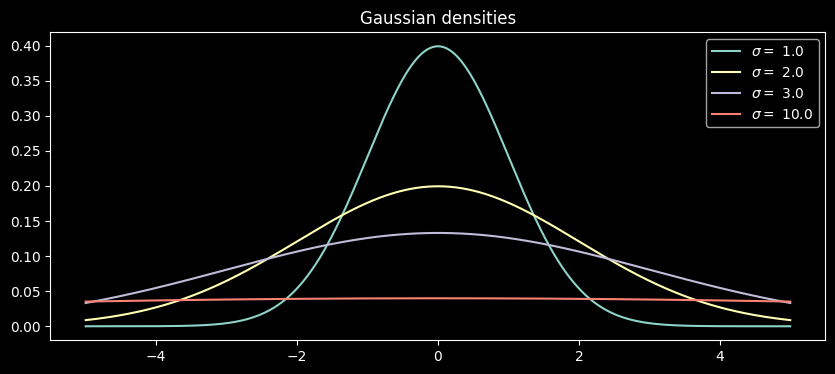

In [31]:
xMin, xMax = -10., 10.
sigmas = [1., 2., 3., 10.]
xx = np.linspace(xMin, xMax, 10000)

plt.figure(figsize=(10,4))
gauss_densities = []
for sig in sigmas:
    
    gauss_densities.append([gauss_density(x,sig) for x in xx])
    plt.plot(xx, gauss_densities[-1], label='$\sigma=$ %.1f' %sig)
    
plt.title("Gaussian densities")
plt.legend(loc='best')
plt.show()

Numerical integration documentation: 
- Simpson's rule: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html
- Adaptive quadrature: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

In [32]:
print('Numerical integration for f:')
print("***************************")
for (i,sig) in enumerate(sigmas):
    print('sigma=', sig)
    qf = quad(gauss_density, xMin, xMax, args=(sig,))
    qs = simps(gauss_densities[i], xx)
    print("Quadrature: ", qf)
    print("Simpson: ", qs)
    print("***************************")

Numerical integration for f:
***************************
sigma= 1.0
Quadrature:  (0.9999994266968564, 8.668320644611427e-10)
Simpson:  0.9999994266968592
***************************
sigma= 2.0
Quadrature:  (0.9875806693484477, 8.131326825877963e-09)
Simpson:  0.9875806693494068
***************************
sigma= 3.0
Quadrature:  (0.9044192954543706, 1.0752880637243533e-13)
Simpson:  0.9044192954549165
***************************
sigma= 10.0
Quadrature:  (0.3829249225480263, 4.251320657156236e-15)
Simpson:  0.3829249225480042
***************************


# Optimisation and root-finding

We investigate some of the importants routines within the `scipy.optimize` package https://docs.scipy.org/doc/scipy/reference/optimize.html

## Root finding

We are interested in finding the (unique?) solution to the equation
\begin{equation*}
f(x) = 0,
\end{equation*}
over some given interval.


In [37]:
from scipy.optimize import fsolve, root, minimize

def f(x):
    return x**2 - 1.
    
fsolve(f, x0=-3.) # try x0=-3., 0., 2.

array([-1.])

Note that this is a local solver (fast, but only return 1 solution), that needs a starting estimate. It also works in the multidimensional setting:

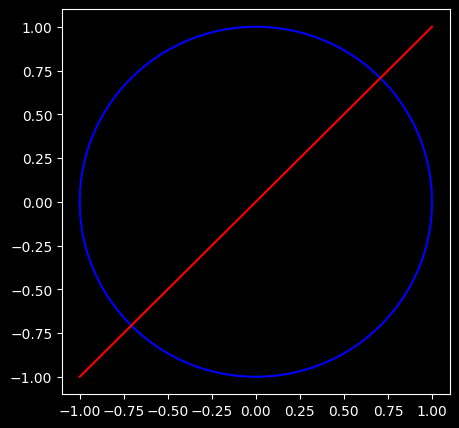

In [38]:
def f(x):
    return [x[0]**2+x[1]**2-1., x[0]-x[1]]

x0 = [.2, .4]
aa = np.linspace(-1.,1.,1000)
cirP = np.sqrt(1.-aa**2)
cirM = -np.sqrt(1.-aa**2)
lin = [a for a in aa]

plt.figure(figsize=(5,5))
plt.plot(aa,cirP, 'b')
plt.plot(aa,cirM, 'b')
plt.plot(aa,lin,'r')
plt.show()

In [39]:
print(fsolve(f, x0))

[0.70710678 0.70710678]


In [40]:
print(root(f, x0))

    fjac: array([[ 0.72956803,  0.68390825],
       [-0.68390825,  0.72956803]])
     fun: array([2.22044605e-16, 0.00000000e+00])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-3.95595807e-12,  3.70837570e-12])
       r: array([ 1.46218444,  0.60134565, -1.93438472])
  status: 1
 success: True
       x: array([0.70710678, 0.70710678])


## Optimisation

**Remark:** Root-finding problems can be recast as minimisation problem. For example, solving $f(x) = c$ can be tackled as
\begin{equation*}
\min_{x} \left[f(x)-c\right]^2.
\end{equation*}

When solving an optimisation problem of the form $\min_{x}g(x)$, we first need to consider the following question:
- Is the objective function $g$ convex?
- Is the objective function $g$ smooth, i.e. is its gradient defined everywhere?
- Are there constraints?

### One-dimensional optimisation

In [ ]:
from scipy.optimize import minimize_scalar
def f(x):
    return x*x-1.

def f2(x):
    return f(x)**2

result = minimize_scalar(f2)
print(result)
print("*******************")
result2 = minimize_scalar(f2, bounds=(-4., 0.), method='bounded')
print(result2)

# Pricing Options in the Black-Scholes model

## Option Pricing

A European Call option on some stock $(S_t)_{t\geq 0}$ gives the holder the right (but not the obligation) to exchange the stock at a future time $T$ for a given price $K$.
The initial value of such an option is therefore (by no-arbitrage arguments):
\begin{equation*}
C(S_0, K, T) = \mathbb{E}\left[\max(S_T-K, 0)\right] = 
\mathbb{E}\left[(S_{T}-K)\mathbb{1}_{S_T\geq K} + 0\mathbb{1}_{S_T< K}\right].
\end{equation*}
*Note: We consider no interest rate nor dividends here*.

## A quick and dirty introduction to Black-Scholes

The Black–Scholes model is one of the cornerstones of mathematical finance.
It assumes that the underlying stock price has the following dynamics:
$$
S_t
 = S_0\exp\left\{-\frac{\sigma^2 t}{2} + \sigma W_t\right\}
 = S_0\exp\left\{-\frac{\sigma^2 t}{2} + \sigma\widetilde{n}\sqrt{t}\right\} \text{ (in distribution)},
$$
for each $t\geq 0$, for some constant $\sigma>0$, and where $\widetilde{n}$ is a standard Gaussian random variable.
Here $(W_t)_{t\geq 0}$ is a standard Brownian motion, and satisfies:
- $W_0 = 0$ almost surely;
- for any $0\leq s \leq t$, $W_t - W_s$ is a Gausssian random variable with mean zero and variance $t-s$;
- non-overlapping increments are independent.

The value of a European Call option on $(S_t)_{t\geq 0}$ in the Black-Scholes model is given, at time $t\in [0,T]$, by
$$
C^{\mathrm{BS}}(S_0, 0, K, T;\sigma) := \mathbb{E}\left[\max(S_{T} - K, 0)\right]
 = S_0\left(\mathcal{N}(d_{+})-\mathrm{e}^{k}\mathcal{N}(d_{-})\right),
$$
where
$$
d_{\pm} = \frac{-k}{\sigma\sqrt{T}} \pm\frac{\sigma\sqrt{T}}{2}
$$
and
- $k := \log\left(K / S_0\right)$ is called the log **moneyness** (this reflects the strike!);
- $\mathcal{N}(\cdot)$ is the cumulative distribution function of the standard normal distribution,
- $T - t$ is the time to maturity;
- $S_t$ is the spot price of the underlying asset;
- $K$ is the strike price;
- $\sigma$ is the volatility  of returns of the underlying asset.


## Pricing via the closed-form formula

In [41]:
from scipy.stats import norm
import numpy as np

def blackscholes_call(S0, K, sigma, t, T):
    '''
    #Inputs:
    S0: initial stock price
    K: strike
    sigma: instantaneous volatility
    T: time to maturity
    #Output:
    Black-Scholes Call price
    '''
    tau = T - t
    sigmtau = sigma*np.sqrt(tau)
    k = np.log(K/S0)
    dp = -k / sigmtau + 0.5*sigmtau
    dm = dp - sigmtau
    return S0*(norm.cdf(dp) - np.exp(k)*norm.cdf(dm))

In [42]:
S0, K, sigma, t, T = 100., 100., 0.2, 0., 1.
print("Black-Scholes Call option price:", blackscholes_call(S0,K,sigma,t,T))

Black-Scholes Call option price: 7.965567455405798


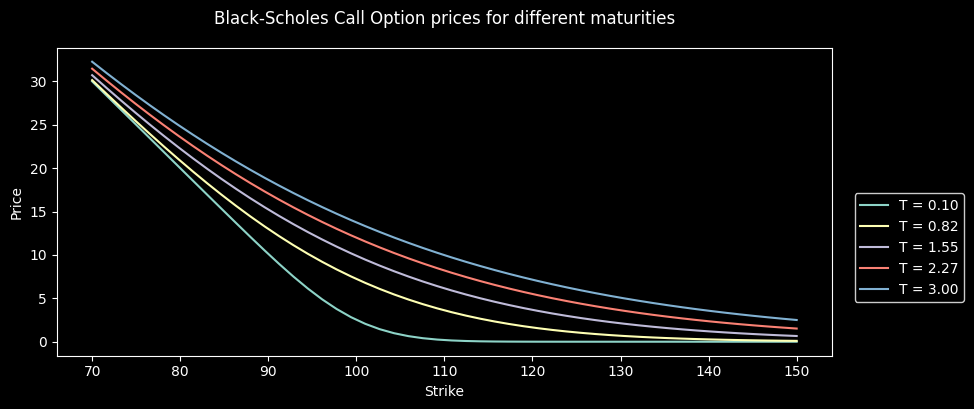

In [43]:
TT = np.linspace(0.1,3.,5)
strikes = np.linspace(70., 150, 50)
plt.figure(figsize=(10, 4))

for T in TT:
    plt.plot(strikes, [blackscholes_call(S0,K,sigma,t,T) for K in strikes], label='T = %.2f' %T)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.55),fancybox=True, shadow=True, ncol=1)
plt.title('Black-Scholes Call Option prices for different maturities',y=1.05,fontsize=12)
plt.xlabel('Strike')
plt.ylabel('Price')
plt.show()

*Note:  one could also vectorise the Black-Scholes function first.*

## Pricing by integration

Recall that under the Black-Scholes model, the stock price satisfies at maturity $T$,
\begin{equation*}
S_T
 = S_0\exp\left\{-\frac{\sigma^2 T}{2} + \sigma\widetilde{n}\sqrt{T}\right\},
\end{equation*}
where $\widetilde{n}$ is a Gaussian random variable. Therefore, for any function $f:\mathbb{R}_+\to\mathbb{R}$, we can write
\begin{equation*}
\mathbb{E}\left[f(S_T)\right] = 
\mathbb{E}\left[f\left(S_0\exp\left\{-\frac{\sigma^2 T}{2} + \sigma\widetilde{n}\sqrt{T}\right\}\right)\right] =
\int_{\mathbb{R}}f\left(S_0\exp\left\{-\frac{\sigma^2 T}{2} + \sigma x\sqrt{T}\right\}\right)\phi(x) \mathrm{d} x,
\end{equation*}
where
\begin{equation*}
\phi(x) := \frac{1}{\sqrt{2\pi}}\exp\left\{-\frac{x^2}{2}\right\}
\end{equation*}
is the Gaussian density.

**Exercise:** Check the Black-Scholes price by integration. Hints / advice:
- Plot the integrand as a function of $x$ to determine how to truncate the real line (integration domain);
- Use different numerical integration packages.

## Pricing by simulation

### Simulating Brownian motion with the Euler-Maruyama method

A Brownian motion $(W_t)_{t\geq 0}$ has the following properties:
- $W_0 = 0$;
- For any $t \geq 0$, $\delta \in (0,t)$, $W_{t+\delta} - W_{t}$ is distributed as a Gaussian with mean zero and variance $\delta$;
- For any $0\leq s < t \leq u < v$, 
the increments $(W_v - W_u)$ and $(W_t-W_s)$ are independent.

Therefore, on the interval $[0,T]$, create a partition $0=t_0< \cdots < t_i < t_{i+1}<\cdots<t_n=T$, so that
$$
W_T = W_{t_n} = \left(W_{t_n} - W_{t_{n-1}}\right) + \cdots + \left(W_{t_1} - W_{t_{0}}\right).
$$
Using Property (ii) above, this is equal in distribution to
$$
W_T = W_{t_n} = \sqrt{t_n-t_{n-1}}\ \widetilde{N}_{n-1} + \cdots +\sqrt{t_{1}-t_{0}}\ \widetilde{N}_{0},
$$
where the sequence $(\widetilde{N}_{i})_{i}$ is iid centered Gaussian with unit variance.


In [ ]:
T, n, nbPaths = 1., 1000, 50
tt = np.linspace(0., T, n) ## Equidistant discretisation grid
dt = tt[1] - tt[0]

In [ ]:
t0 = time.time()
ww = np.zeros((n, nbPaths)) ## The Brownian motion starts at zero
N = np.random.normal(0.,1., (nbPaths, n-1))
for path in range(nbPaths):
    for (i,t) in enumerate(tt[:-1]):
        #ww[i+1,path] = ww[i,path] + np.sqrt(dt) * np.random.normal(0.,1.)
        ww[i+1,path] = ww[i,path] + np.sqrt(dt) * N[path,i]
t1 = time.time()-t0
print("Computation time: ", t1, " seconds")

plt.figure(figsize=(10,4))
for path in range(nbPaths):
    plt.plot(tt, ww[:, path])
plt.title("Simulated paths of a Brownian motion")
plt.show()

### Using `numpy` vectorisation

In [ ]:
t0 = time.time()
nn = np.random.normal(0., 1., (n-1, nbPaths)) * np.sqrt(dt)
ww = np.zeros((n, nbPaths))
ww[1:,:] = np.cumsum(nn, axis=0)
t1 = time.time()-t0
print("Computation time: ", t1, " seconds")
plt.figure(figsize=(10,4))
for path in range(nbPaths):
    plt.plot(tt, ww[:, path])
plt.title("Simulated paths of a Brownian motion")
plt.show()

## Computing the implied volatility

Given a strike $K$, a maturity $T$ and an underlying stock $S$, we can observe the European Call price $C^{\mathrm{observed}}(S_0, K, T)$.
The **implied volatility** is defined as the unique non-negative number $\sigma$ solution to the equation **(root-finding problem!)**
\begin{equation*}
C^{\mathrm{observed}}(S_0, K, T) = C^{\mathrm{BS}}(S_0, K, T; \sigma).
\end{equation*}
The implied volatility is a kew concept in trading, and options are usually quoted in terms of their implied volatilities rather than in option prices.

# Potentially useful packages

List of useful (at least for reference) Python libraries for Finance:
- `zipline`: ties the statistics, the data structures, and the data sources all together using quandl data.
- `pyfolio`: generate tearsheets containing performance statistics for strategies developed in zipline.
- `quantlib`: extensive library for quantitative finance (pricing, yield curves, market conventions....)
- `scikit-learn`: machine learning package
- Exhaustive list of Finance-related libraries (not all useful or efficient): https://github.com/wilsonfreitas/awesome-quant